In [ ]:
"""1,2"""
import pandas as pd

usa_dol=pd.read_excel('usa_dol.xlsx')
canad_dol=pd.read_excel('canad_dol.xlsx')
eur=pd.read_excel('eur.xlsx')

usa_dol=usa_dol.drop(['cdx','nominal'],axis=1)
canad_dol=canad_dol.drop(['cdx','nominal'],axis=1)
eur=eur.drop(['cdx','nominal'],axis=1)

usa_dol.rename(columns={"curs":"USD"}, inplace=True)
canad_dol.rename(columns={"curs":"CAD"}, inplace=True)
eur.rename(columns={"curs":"EUR"}, inplace=True)

df=usa_dol.merge(canad_dol,on=['data'])
df=df.merge(eur,on=['data'])
df

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,data,USD,CAD,EUR
0,2022-11-02,61.4275,45.0051,60.9668
1,2022-11-01,61.6229,45.2610,61.1196
2,2022-10-29,61.5343,45.4228,61.1328
3,2022-10-28,61.3589,45.2332,61.5718
4,2022-10-27,61.4277,45.0416,61.5682
...,...,...,...,...
1248,2017-10-07,57.7612,45.9005,67.5344
1249,2017-10-06,57.5811,46.1794,67.7787
1250,2017-10-05,57.7832,46.3006,67.9357
1251,2017-10-04,57.9375,46.2907,67.9839


In [ ]:
"""3"""
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale

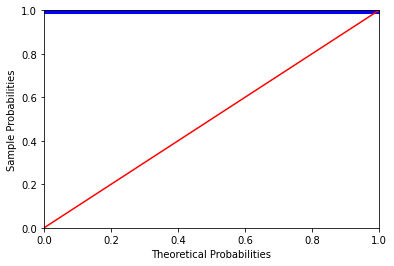

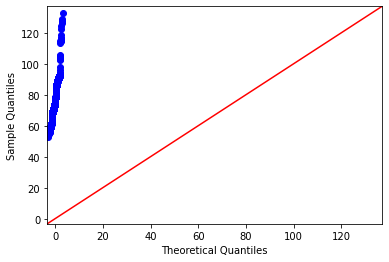

In [ ]:
eur_plot=sm.ProbPlot(df['EUR'])
eur_plot.ppplot(line='45')
eur_plot.qqplot(line='45')
plt.show()

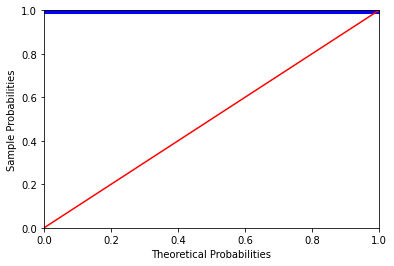

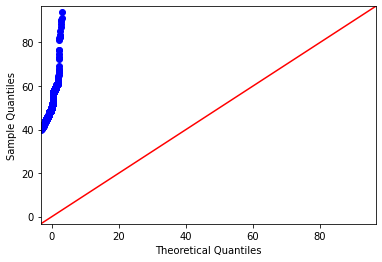

In [ ]:
canad_plot=sm.ProbPlot(df['CAD'])
canad_plot.ppplot(line='45')
canad_plot.qqplot(line='45')
plt.show()

In [ ]:
#стандартизация
df_stand=df
df_stand['USD'] = minmax_scale(df['USD'])
df_stand['CAD'] = minmax_scale(df['CAD'])
df_stand['EUR'] = minmax_scale(df['EUR'])
df_stand

,data,USD,CAD,EUR
0,2022-11-02,0.148359,0.096822,0.102579
1,2022-11-01,0.151182,0.101553,0.104484
2,2022-10-29,0.149902,0.104545,0.104648
3,2022-10-28,0.147368,0.101039,0.110121
4,2022-10-27,0.148362,0.097497,0.110076
...,...,...,...,...
1248,2017-10-07,0.095394,0.113377,0.184449
1249,2017-10-06,0.092792,0.118534,0.187494
1250,2017-10-05,0.095712,0.120774,0.189451
1251,2017-10-04,0.097941,0.120591,0.190052


In [ ]:
#нормализация
scaler_std=preprocessing.StandardScaler()
df_stand['USD'] = scaler_std.fit_transform(df[['USD']])
df_stand['EUR'] = scaler_std.fit_transform(df[['EUR']])
df_stand['CAD'] = scaler_std.fit_transform(df[['CAD']])
df_stand

,data,USD,CAD,EUR
0,2022-11-02,-0.810863,-1.093862,-1.590240
1,2022-11-01,-0.786848,-1.055953,-1.575659
2,2022-10-29,-0.797737,-1.031984,-1.574399
3,2022-10-28,-0.819294,-1.060072,-1.532505
4,2022-10-27,-0.810839,-1.088455,-1.532849
...,...,...,...,...
1248,2017-10-07,-1.261466,-0.961218,-0.963492
1249,2017-10-06,-1.283601,-0.919901,-0.940178
1250,2017-10-05,-1.258762,-0.901947,-0.925195
1251,2017-10-04,-1.239798,-0.903413,-0.920596


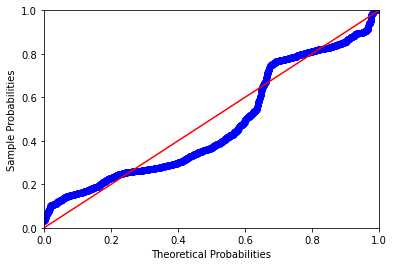

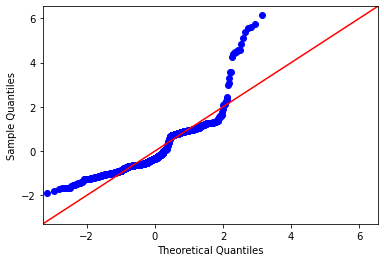

In [ ]:
canad_plot=sm.ProbPlot(df_stand['CAD'])
canad_plot.ppplot(line='45')
canad_plot.qqplot(line='45')
plt.show()

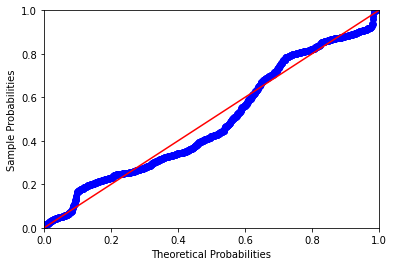

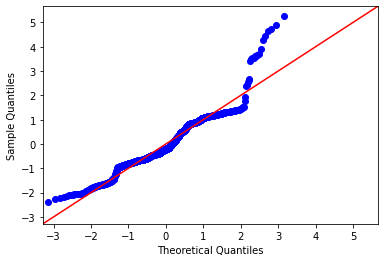

In [ ]:
eur_plot=sm.ProbPlot(df_stand['EUR'])
eur_plot.ppplot(line='45')
eur_plot.qqplot(line='45')
plt.show()

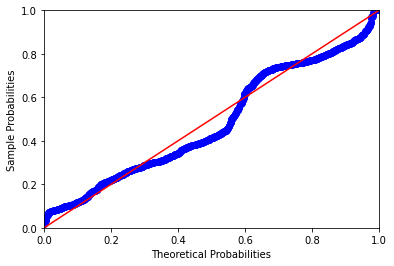

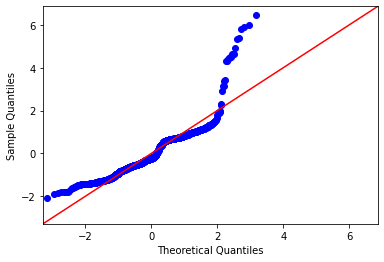

In [ ]:
usd_plot=sm.ProbPlot(df_stand['USD'])
usd_plot.ppplot(line='45')
usd_plot.qqplot(line='45')
plt.show()

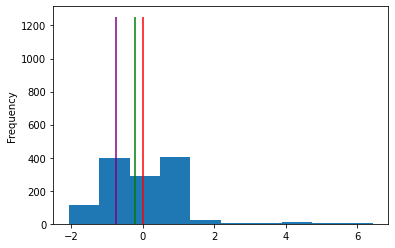

In [ ]:
"""4"""
fig, ax = plt.subplots()
ax.vlines(df["USD"].mean(), 0, df["USD"].size, colors = "Red")
ax.vlines(df["USD"].median(), 0, df["USD"].size, colors = "Green")
ax.vlines(df["USD"].mode()[0], 0, df["USD"].size, colors = "Purple")
df["USD"].plot.hist()
plt.show()

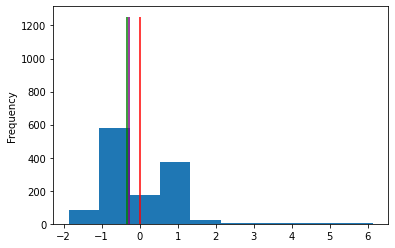

In [ ]:
fig, ax = plt.subplots()
ax.vlines(df["CAD"].mean(), 0, df["CAD"].size, colors = "Red")
ax.vlines(df["CAD"].median(), 0, df["CAD"].size, colors = "Green")
ax.vlines(df["CAD"].mode()[0], 0, df["CAD"].size, colors = "Purple")
df["CAD"].plot.hist()
plt.show()

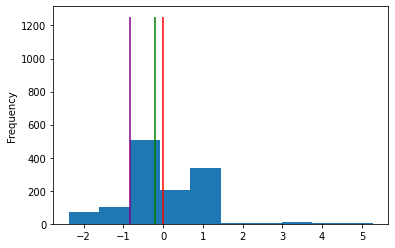

In [ ]:
fig, ax = plt.subplots()
ax.vlines(df["EUR"].mean(), 0, df["EUR"].size, colors = "Red")
ax.vlines(df["EUR"].median(), 0, df["EUR"].size, colors = "Green")
ax.vlines(df["EUR"].mode()[0], 0, df["EUR"].size, colors = "Purple")
df["EUR"].plot.hist()
plt.show()

In [ ]:
"""5"""
len(df)

1253

используется критерий Шапиро-Уилка так, как число наблюдений < 2000

p.s.

7-2000 наблюдений – критерий Шапиро-Уилка (основан на отношении оптимальной
линейной несмещённой оценке дисперсии к её обычной оценке методом
максимального правдоподобия);

In [ ]:
from scipy import stats
print(stats.shapiro(list(df["USD"])), stats.shapiro(list(df["CAD"])), stats.shapiro(list(df["EUR"])), sep='\n')

ShapiroResult(statistic=0.8784806728363037, pvalue=3.429513984399734e-30)
ShapiroResult(statistic=0.8557507991790771, pvalue=2.3233576783709402e-32)
ShapiroResult(statistic=0.9436990022659302, pvalue=1.9691165748279453e-21)


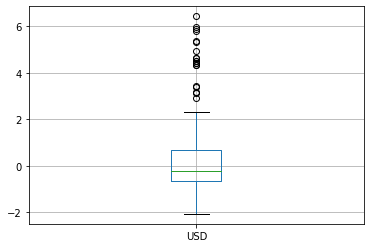

In [ ]:
"""6"""
df.boxplot(column="USD")


очистка данных для переменной USD

In [ ]:
Q1 =  df['USD'].quantile(0.25)
Q3 = df['USD'].quantile(0.75)
IQR = Q3 - Q1
data_usd = pd.DataFrame(df['USD']).query("@Q1 - 1.5*@IQR < USD < @Q3 + 1.5*@IQR")
data_usd

,USD
0,-0.810863
1,-0.786848
2,-0.797737
3,-0.819294
4,-0.810839
...,...
1248,-1.261466
1249,-1.283601
1250,-1.258762
1251,-1.239798


очистка данных для переменной CAD

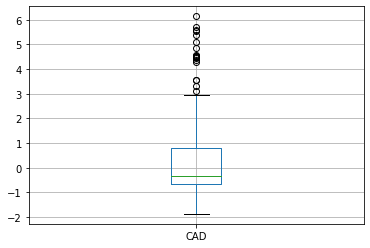

In [ ]:
df.boxplot(column="CAD")

In [ ]:
Q1 =  df['CAD'].quantile(0.25)
Q3 = df['CAD'].quantile(0.75)
IQR = Q3 - Q1
data_cad = pd.DataFrame(df['CAD']).query("@Q1 - 1.5*@IQR < CAD < @Q3 + 1.5*@IQR")
data_cad

,CAD
0,-1.093862
1,-1.055953
2,-1.031984
3,-1.060072
4,-1.088455
...,...
1248,-0.961218
1249,-0.919901
1250,-0.901947
1251,-0.903413


очистка данных для переменной EUR

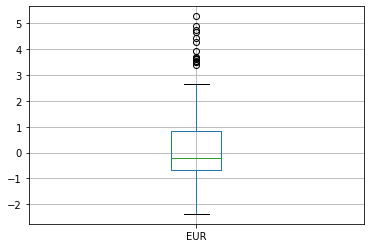

In [ ]:
df.boxplot(column="EUR")

In [ ]:
Q1 =  df['EUR'].quantile(0.25)
Q3 = df['EUR'].quantile(0.75)
IQR = Q3 - Q1
data_eur = pd.DataFrame(df['EUR']).query("@Q1 - 1.5*@IQR < EUR < @Q3 + 1.5*@IQR")
data_eur

,EUR
0,-1.590240
1,-1.575659
2,-1.574399
3,-1.532505
4,-1.532849
...,...
1248,-0.963492
1249,-0.940178
1250,-0.925195
1251,-0.920596


повторные исследования

In [ ]:
print(stats.shapiro(list(data_usd['USD'])), stats.shapiro(list(data_cad['CAD'])), stats.shapiro(list(data_eur['EUR'])), sep='\n')

ShapiroResult(statistic=0.964260458946228, pvalue=7.48832579561067e-17)
ShapiroResult(statistic=0.9303284883499146, pvalue=1.6056910316088156e-23)
ShapiroResult(statistic=0.9662734270095825, pvalue=2.2847080566783327e-16)


Text(0, 0.5, 'USD')

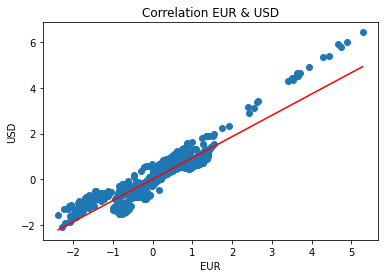

In [ ]:
"""7"""
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.scatter(df['EUR'], df['USD'])

plt.plot(np.unique(df['EUR']), np.poly1d(np.polyfit(df['EUR'], df['USD'], 1))(np.unique(df['EUR'])), color='red')

plt.title('Correlation EUR & USD')
plt.xlabel('EUR')
plt.ylabel('USD')


Text(0, 0.5, 'CAD')

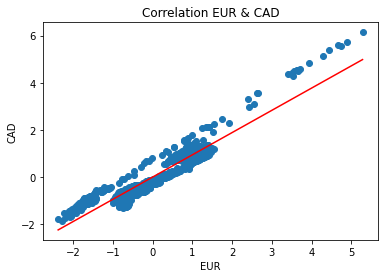

In [ ]:
plt.scatter(df['EUR'], df['CAD'])

plt.plot(np.unique(df['EUR']), np.poly1d(np.polyfit(df['EUR'], df['CAD'], 1))(np.unique(df['EUR'])), color='red')

plt.title('Correlation EUR & CAD')

plt.xlabel('EUR')
plt.ylabel('CAD')

Text(0, 0.5, 'CAD')

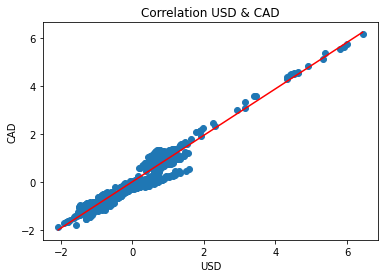

In [ ]:
plt.scatter(df['USD'], df['CAD'])

plt.plot(np.unique(df['USD']), np.poly1d(np.polyfit(df['USD'], df['CAD'], 1))(np.unique(df['USD'])), color='red')

plt.title('Correlation USD & CAD')

plt.xlabel('USD')
plt.ylabel('CAD')

In [ ]:
"""8"""
print ('EUR & USD')
pr = stats.pearsonr(df['USD'], df['EUR'])
print ('Пирсона: ', pr)
pr = stats.spearmanr(df['USD'], df['EUR'])
print ('Спирмена: ', pr)
pr = stats. kendalltau(df['USD'], df['EUR'])
print ('Кендалла: ', pr)
#полнаякорреляция, по Спирмену весьма высокая, р маленький:отбрасываем гипотезу об отсутствии корреляции

EUR & USD
Пирсона:  (0.9332625360402936, 0.0)
Спирмена:  SpearmanrResult(correlation=0.9353070190571494, pvalue=0.0)
Кендалла:  KendalltauResult(correlation=0.7804146377145194, pvalue=0.0)


In [ ]:
print ('EUR & CAD')
pr = stats.pearsonr(df['CAD'], df['EUR'])
print ('Пирсона: ', pr)
pr = stats.spearmanr(df['CAD'], df['EUR'])
print ('Спирмена: ', pr)
pr = stats. kendalltau(df['CAD'], df['EUR'])
print ('Кендалла: ', pr)
#полнаякорреляция, по Спирмену весьма высокая, р маленький:отбрасываем гипотезу об отсутствии корреляции

EUR & CAD
Пирсона:  (0.9438190119880252, 0.0)
Спирмена:  SpearmanrResult(correlation=0.9425415471298333, pvalue=0.0)
Кендалла:  KendalltauResult(correlation=0.7959662151394422, pvalue=0.0)


In [ ]:
print ('USD & CAD')
pr = stats.pearsonr(df['CAD'], df['USD'])
print ('Пирсона: ', pr)
pr = stats.spearmanr(df['CAD'], df['USD'])
print ('Спирмена: ', pr)
pr = stats. kendalltau(df['CAD'], df['USD'])
print ('Кендалла: ', pr)
#полнаякорреляция, по Спирмену весьма высокая, р маленький:отбрасываем гипотезу об отсутствии корреляции

USD & CAD
Пирсона:  (0.9680915399501483, 0.0)
Спирмена:  SpearmanrResult(correlation=0.958491452088415, pvalue=0.0)
Кендалла:  KendalltauResult(correlation=0.8282924609148445, pvalue=0.0)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'USD')

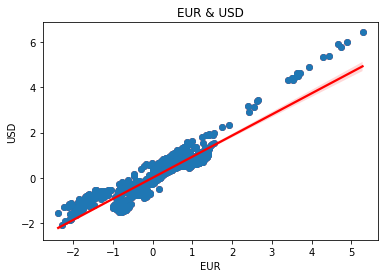

In [ ]:
"""9"""
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import seaborn as sns

sns.regplot(df.EUR, df.USD, color = 'red')
plt.scatter(df['EUR'], df['USD'])

plt.title('EUR & USD')
plt.xlabel('EUR')
plt.ylabel('USD')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'CAD')

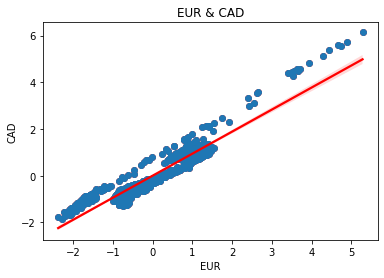

In [ ]:
sns.regplot(df.EUR, df.CAD, color = 'red')
plt.scatter(df['EUR'], df['CAD'])

plt.title('EUR & CAD')
plt.xlabel('EUR')
plt.ylabel('CAD')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'CAD')

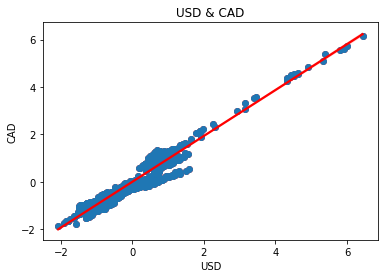

In [ ]:
sns.regplot(df.USD, df.CAD, color = 'red')
plt.scatter(df['USD'], df['CAD'])

plt.title('USD & CAD')
plt.xlabel('USD')
plt.ylabel('CAD')